In [ ]:
!pip install tensorflow

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [11]:
import os
import pandas as pd
import numpy as np
import PIL
import tensorflow as tf
import pathlib
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [8]:
data_dir = os.listdir('/content/drive/MyDrive/Bone Break Classification/Bone Break Classification')

In [9]:
data_dir

['Avulsion fracture',
 'Greenstick fracture',
 'Impacted fracture',
 'Pathological fracture',
 'Oblique fracture',
 'Spiral Fracture',
 'Comminuted fracture',
 'Fracture Dislocation',
 'Hairline Fracture',
 'Longitudinal fracture']

In [5]:
image_count = len(list(data_dir))
print(image_count)

10


In [14]:
train_data = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Bone Break Classification/Bone Break Classification',
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="training",
    shuffle=True,
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=40
)

#load the test data
validation_data = tf.keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Bone Break Classification/Bone Break Classification',
    labels="inferred",
    label_mode="int",
    validation_split=0.1,
    subset="validation",
    color_mode="rgb",
    image_size=(256,256),
    batch_size=64,
    seed=42
)

Found 1129 files belonging to 10 classes.
Using 1017 files for training.
Found 1129 files belonging to 10 classes.
Using 112 files for validation.


In [15]:
class_names = train_data.class_names
print(class_names)


['Avulsion fracture', 'Comminuted fracture', 'Fracture Dislocation', 'Greenstick fracture', 'Hairline Fracture', 'Impacted fracture', 'Longitudinal fracture', 'Oblique fracture', 'Pathological fracture', 'Spiral Fracture']


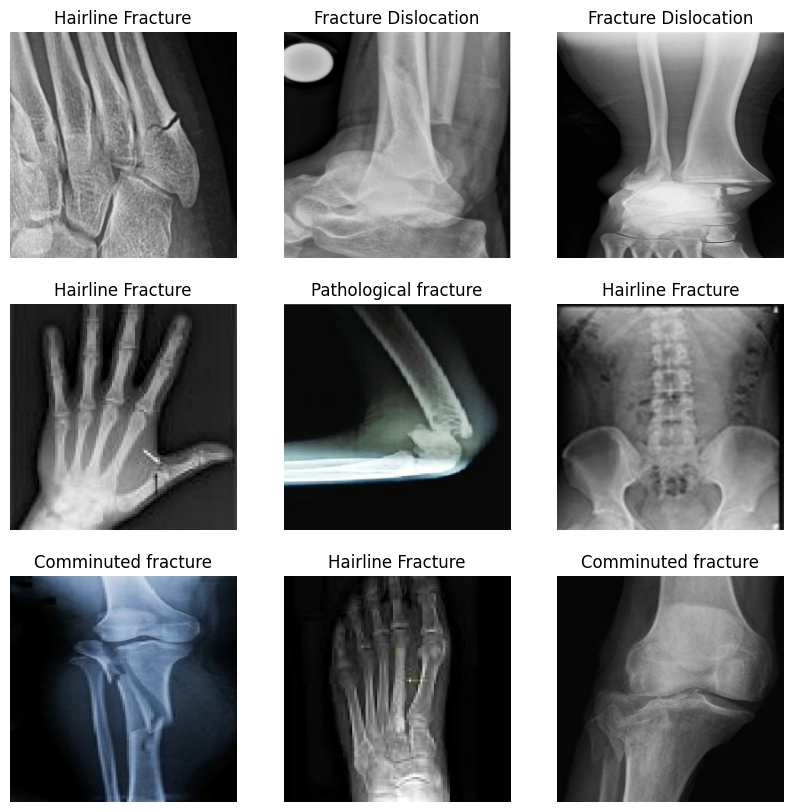

In [16]:
plt.figure(figsize=(10, 10))
for images, labels in train_data.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


In [18]:
for image_batch, labels_batch in train_data:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(64, 256, 256, 3)
(64,)


In [19]:
normalization_layer = layers.Rescaling(1./255)


In [20]:
normalized_ds = train_data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalized_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


0.0 1.0


In [21]:
img_height = 256
img_width = 256

In [22]:
num_classes = len(class_names)
model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [24]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 256, 256, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 65536)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     8,388,736 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,413,610 (32.10 MB)

 Trainable params: 8,413,610 (32.10 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
epochs=10
history = model.fit(
  train_data,
  validation_data=validation_data,
  epochs=epochs
)


Epoch 1/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 111s 7s/step - accuracy: 0.1250 - loss: 3.0451 - val_accuracy: 0.1429 - val_loss: 2.2969
Epoch 2/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 111s 5s/step - accuracy: 0.1422 - loss: 2.2955 - val_accuracy: 0.2500 - val_loss: 2.2234
Epoch 3/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 85s 5s/step - accuracy: 0.2196 - loss: 2.2317 - val_accuracy: 0.2679 - val_loss: 2.0285
Epoch 4/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 83s 5s/step - accuracy: 0.3130 - loss: 1.9754 - val_accuracy: 0.4911 - val_loss: 1.7306
Epoch 5/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 138s 5s/step - accuracy: 0.4367 - loss: 1.6822 - val_accuracy: 0.6250 - val_loss: 1.2274
Epoch 6/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 85s 5s/step - accuracy: 0.6417 - loss: 1.1537 - val_accuracy: 0.8125 - val_loss: 0.8731
Epoch 7/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 143s 5s/step - accuracy: 0.7714 - loss: 0.7967 - val_accuracy: 0.8571 - val_loss: 0.6500
Epoch 8/10
16/16 ━━━━━━━━━━━━━━━━━━━━ 142s 5s/step - accuracy: 0.8542 - loss: 0.5530 - val_accuracy: 0.9018 - val_

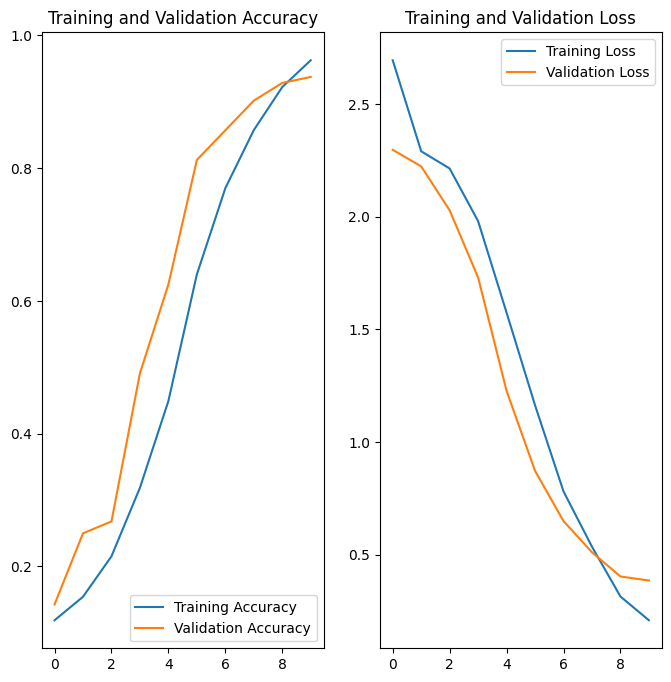

In [28]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [29]:
model.save('/content/drive/MyDrive/Bone Break Classification/Bone Break Classification/model.h5')